Removed: Weather_Index

Final Model Summary (Backward Elimination):
                            OLS Regression Results                            
Dep. Variable:      Construction_Cost   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.153e+04
Date:                Wed, 12 Feb 2025   Prob (F-statistic):          1.23e-171
Time:                        11:16:58   Log-Likelihood:                -372.31
No. Observations:                 100   AIC:                             756.6
Df Residuals:                      94   BIC:                             772.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

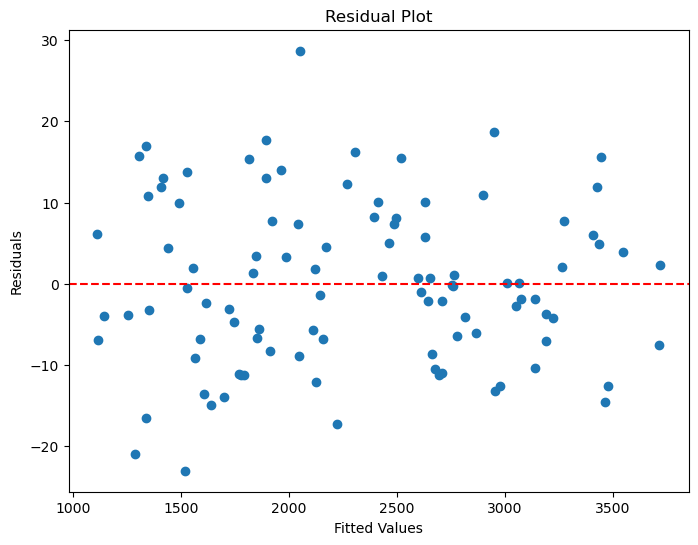

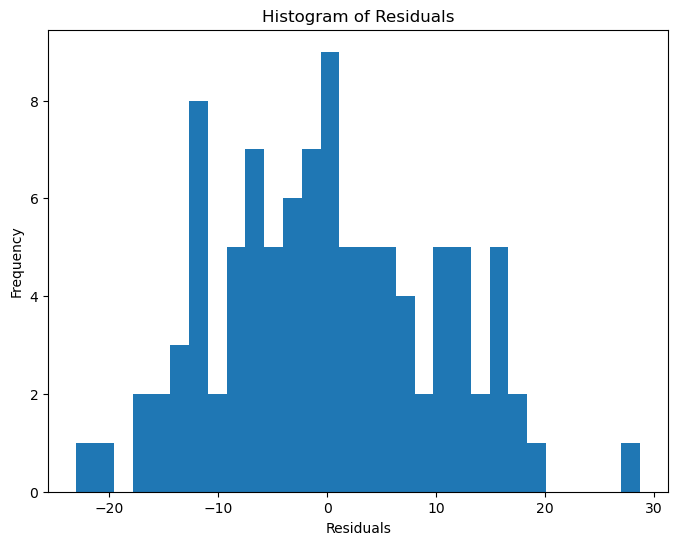

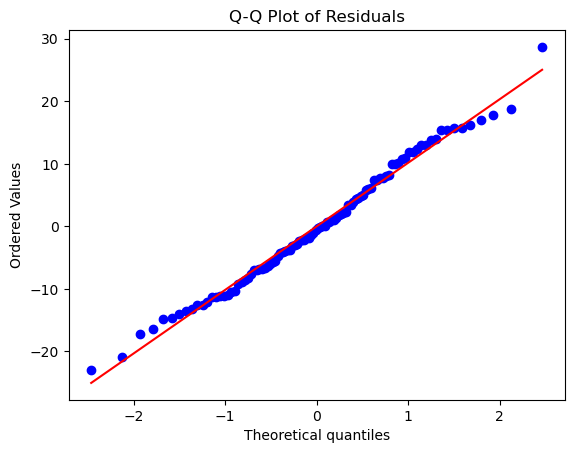


Outliers (Z-score > 3):
Empty DataFrame
Columns: [Project_ID, Building_Height, Material_Quality_Index, Labor_Cost, Concrete_Strength, Foundation_Depth, Weather_Index, Construction_Cost]
Index: []


In [20]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV  # For Lasso Regression
X = sm.add_constant(X)
def backward_elimination(X, y, p_threshold=0.05):
    cols = list(X.columns)
    while True:
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues.drop('const') #Drop the constant value.
        max_p_value = p_values.max()
        if max_p_value > p_threshold:
            col_to_remove = p_values.idxmax()
            X = X.drop(col_to_remove, axis=1)
            print(f"Removed: {col_to_remove}")
        else:
            break
    return X

X_final = backward_elimination(X, y)
model_final = sm.OLS(y, X_final).fit()
print("\nFinal Model Summary (Backward Elimination):")
print(model_final.summary())

lasso_model = LassoCV(cv=5, random_state=0).fit(X.drop('const',axis=1), y) #Drop the constant for lasso.
coefs = pd.Series(lasso_model.coef_, index=X.drop('const',axis=1).columns)
print("\nLasso Coefficients:")
print(coefs)
print("Variables kept by Lasso:", coefs[coefs != 0].index.tolist())

residuals = model_final.resid
plt.figure(figsize=(8, 6))
plt.scatter(model_final.fittedvalues, residuals) #Plot of fitted values vs residuals.
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# Q-Q Plot
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


z_scores = np.abs(stats.zscore(residuals))
outliers = np.where(z_scores > 3) #Example: Z-score > 3 is considered an outlier. Adjust as needed.
print("\nOutliers (Z-score > 3):")
print(df.iloc[outliers[0]])

# * Real-time data: Material prices, labor costs, weather forecasts, and equipment availability.
# * API integration: Connect to databases, cost estimation software, and project management tools.
# * User interface: A user-friendly interface for inputting project parameters and viewing cost estimates.
# * Model retraining: Regularly retrain the model with updated data to maintain accuracy.

# * Overestimation: Can lead to lost bids, project delays, or unnecessary expenses.
# * Underestimation: Can result in budget overruns, financial strain on the company, compromised safety standards, or even project abandonment.
# * Transparency:  It's crucial to be transparent about the limitations of the model and the assumptions made.
# * Bias:  Be aware of potential biases in the data that could lead to unfair or inaccurate cost predictions.
# * Responsibility:  Cost estimators and decision-makers should take responsibility for the use and interpretation of the model's outputs.  The model is a tool to aid in decision-making, not a replacement for professional judgment.